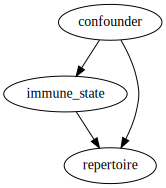

In [30]:
import dagsim.baseDS as ds
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression


confounder_node = ds.Generic(name="confounder", function=np.random.binomial, 
                             arguments={"p": 0.8, 'n': 1})

immune_state_node = ds.Generic(name="immune_state", 
                               function=lambda confounder, p1, p2: np.random.binomial(n=1, p=p1 if confounder else p2), 
                               arguments={"confounder": confounder_node, "p1": 0.9,
                                         "p2": 0.2})

repertoire_node = ds.Generic(name="repertoire", function=lambda immune_state, confounder: (0.5*immune_state + 0.7*confounder + 1.2) > 1.8, 
                             arguments={"immune_state": immune_state_node, "confounder": confounder_node})

graph = ds.Graph(name="exp0", 
                 list_nodes=[confounder_node, immune_state_node, repertoire_node])
graph.draw()


In [31]:
data = pd.DataFrame(graph.simulate(num_samples=500))
data.head(20)

,confounder,immune_state,repertoire
0,1,1,True
1,0,0,False
2,1,1,True
3,1,0,True
4,1,1,True
5,1,1,True
6,1,0,True
7,1,0,True
8,1,1,True
9,1,1,True


In [32]:
# test prediction in causal direction (predict repertoire from confounder and immune state) on train data

log_reg = LogisticRegression()
log_reg.fit(data[['confounder', 'immune_state']], data['repertoire'])

print("Coefficients of logistic regression in causal direction (predict repertoire from confounder and immune state):")
print(log_reg.coef_)
print("Balanced accuracy on train data (causal direction):")
print(balanced_accuracy_score(log_reg.predict(data[['confounder', 'immune_state']]), data['repertoire']))

# test prediction in anticausal direction (immune state from repertoire) on train data

log_reg_anticausal = LogisticRegression()
log_reg_anticausal.fit(data['repertoire'].values.reshape(-1,1), data['immune_state'])

print("Coefficients of logistic regression in anticausal direction (predict immune state from repertoire):")
print(log_reg_anticausal.coef_)
print("Balanced accuracy on train data (anticausal direction):")
print(balanced_accuracy_score(log_reg_anticausal.predict(data['repertoire'].values.reshape(-1,1)), 
                              data['immune_state']))

# prediction in the anticausal direction when the confounder distribution param changes (test data)

confounder_node.additional_parameters['p'] = 0.2

test_data = pd.DataFrame(graph.simulate(num_samples=100))

print("Balanced accuracy when confounder distribution changes:")
print(balanced_accuracy_score(log_reg_anticausal.predict(test_data['repertoire'].values.reshape(-1,1)), 
                              test_data['immune_state']))

test_data.head(20)

Coefficients of logistic regression in causal direction (predict repertoire from confounder and immune state):
[[6.15117985 1.46634969]]
Balanced accuracy on train data (causal direction):
1.0
Coefficients of logistic regression in anticausal direction (predict immune state from repertoire):
[[3.42737992]]
Balanced accuracy on train data (anticausal direction):
0.865581675708258
Balanced accuracy when confounder distribution changes:
0.8811188811188811


,confounder,immune_state,repertoire
0,0,0,False
1,0,1,False
2,0,0,False
3,0,0,False
4,0,1,False
5,0,0,False
6,1,1,True
7,0,0,False
8,0,0,False
9,1,1,True


In [33]:
# prediction (immune state from repertoire and confounder) on train data

log_reg_anticausal_conf = LogisticRegression()
log_reg_anticausal_conf.fit(data[['repertoire', 'confounder']], data['immune_state'])

print("Coefficients of logistic regression (predict immune state from repertoire and confounder):")
print(log_reg_anticausal_conf.coef_)
print("Balanced accuracy on train data:")
print(balanced_accuracy_score(log_reg_anticausal_conf.predict(data[['repertoire', 'confounder']]), 
                              data['immune_state']))

# prediction when the confounder distribution param changes (test data)

print("Balanced accuracy when confounder distribution changges (predict immune state from repertoire and confounder):")
print(balanced_accuracy_score(log_reg_anticausal_conf.predict(test_data[['repertoire', 'confounder']]), 
                              test_data['immune_state']))

test_data.head(20)

Coefficients of logistic regression (predict immune state from repertoire and confounder):
[[1.78655874 1.78655874]]
Balanced accuracy on train data:
0.865581675708258
Balanced accuracy when confounder distribution changges (predict immune state from repertoire and confounder):
0.8811188811188811


,confounder,immune_state,repertoire
0,0,0,False
1,0,1,False
2,0,0,False
3,0,0,False
4,0,1,False
5,0,0,False
6,1,1,True
7,0,0,False
8,0,0,False
9,1,1,True
